In [1]:
# Import the packages required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [18]:
# load the data from the datasets available in scikit learn
dataset = datasets.load_boston()

featuredf = pd.DataFrame(dataset.data, columns=dataset.feature_names)
targetdf = pd.DataFrame(dataset.target, columns=['PRICE'])
print(featuredf.shape, targetdf.shape)

pd.concat([featuredf.head(), targetdf.head()], axis=1)

(506, 13) (506, 1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [84]:
# select the x and y data
x = dataset.data[:, [5]]
y = dataset.target[:, np.newaxis]
print('features', x.shape, x[0], sep=' : ')
print('targets ', y.shape, y[0], sep=' : ')

features : (506, 1) : [6.575]
targets  : (506, 1) : [24.]


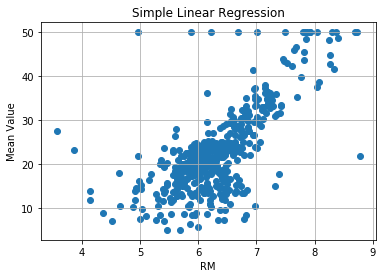

In [77]:
# plot the information
legend = dataset.feature_names[5]

plt.scatter(x, y)
plt.title('Simple Linear Regression')
plt.xlabel(legend)
plt.grid(True)
plt.ylabel('Mean Value')
plt.show()

In [63]:
# Split the dataset in training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape, y_train.shape, x_train[0], y_train[0])
print(x_test.shape, y_test.shape, x_test[0], y_test[0])

(404, 1) (404, 1) [6.951] [26.7]
(102, 1) (102, 1) [6.333] [22.6]


In [64]:
# Define the algorithm to be used, fit the model
alg = linear_model.LinearRegression()
alg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
y_pred = alg.predict(x_train)
r2_error = np.sqrt(((y_pred - y_train) ** 2).sum())
r2_error

131.5274628830721

In [66]:
# Generate a prediction over the test data using the model
y_pred = alg.predict(x_test)
r2_error = np.sqrt(((y_pred - y_test) ** 2).sum())
r2_error

69.17044069538896

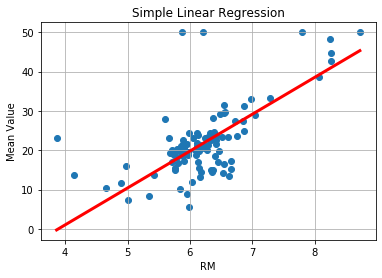

In [78]:
# Graph the test data with the model line
plt.scatter(x_test, y_test)

data_pred = np.hstack([x_test, y_pred])
data_pred = data_pred[data_pred[:,0].argsort()]

plt.plot(data_pred[:, 0], data_pred[:, -1], color='red', linewidth=3)
plt.title('Simple Linear Regression')
plt.xlabel(legend)
plt.grid(True)
plt.ylabel('Mean Value')
plt.show()

In [81]:
# Obtain the parameters ai for this model
a0 = alg.intercept_
print('a0:', a0)
a1 = alg.coef_[0]
print('a1:', a1)
print('y =', a0[0], '+', a1[0], '* x')

a0: [-36.47618963]
a1: [9.37638431]
y = -36.476189627647315 + 9.376384313436258 * x


In [82]:
# Verify the model error based on R²
print('certainty:', alg.score(x_train, y_train) * 100, '%')
print('certainty:', alg.score(x_test, y_test) * 100, '%')

certainty: 49.708000978438434 %
certainty: 42.39438681645629 %
